***

# 1. Importing Packages  

***


**Below are the steps we would go through to load, view and visualize any JSON data into a pandas dataframe.**  

  

In [1]:
import ijson                    # required to extract data from json format
import pandas as pd             # required to load and read data and put in dataframe.

**We add python packages we require.**  

In [2]:
import numpy  as np             # easy to play with arrays etc.
import matplotlib.pyplot as plt # required for data visualization purposes.
import seaborn as sns           # required for data visualization purposes.
import plotly.plotly as py      # required for data visualization purposes.
import plotly.graph_objs as go  # required for data visualization purposes.
from IPython.display import display, HTML
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

***

# 2. Reading Data

***
    
**To read data in the form of .json, you need ijson.items()**  
**This time the parameter we use is meta.view.columns.item. Most json files use a similar structure therefore the code looks pretty similar for any json data**  

**https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-women-infant-and-child-dfe5d is source of data**

**We use pd.DataFrame() to put the data we extracted into a pandas df format**

In [3]:
filename = "data/healthdata.json"
with open(filename, 'r') as f:
    objects = ijson.items(f, 'meta.view.columns.item')
    columns = list(objects)
column_names = [col["fieldName"] for col in columns]

In [4]:
data = []
with open(filename, 'r') as f:
    objects = ijson.items(f, 'data.item')
    for row in objects:
        selected_row = []
        for item in column_names:
            selected_row.append(row[column_names.index(item)])
        data.append(selected_row)
data = pd.DataFrame(data, columns=column_names)
data.head()

,:sid,:id,:position,:created_at,:created_meta,:updated_at,:updated_meta,:meta,yearstart,yearend,...,geolocation,classid,topicid,questionid,datavaluetypeid,locationid,stratificationcategory1,stratification1,stratificationcategoryid1,stratificationid1
0,1,C654472E-D246-412E-AFF6-08D555336351,1,1493377693,965907,1493377693,965907,None,2008,2008,...,"[None, 32.84057112200048, -86.63186076199969, ...",OWS,OWS1,Q040,VALUE,01,Total,Total,OVR,OVERALL
1,2,64BAC96C-5E1E-4F87-B35D-527F943017A1,2,1493377693,965907,1493377693,965907,None,2008,2008,...,"[None, 32.84057112200048, -86.63186076199969, ...",OWS,OWS1,Q040,VALUE,01,Gender,Male,GEN,MALE
2,3,47D23209-2042-4EF6-8C73-81827F1953D7,3,1493377693,965907,1493377693,965907,None,2008,2008,...,"[None, 32.84057112200048, -86.63186076199969, ...",OWS,OWS1,Q040,VALUE,01,Gender,Female,GEN,FEMALE
3,4,54DBE57E-57FD-4252-A8C6-C606E10B526B,4,1493377693,965907,1493377693,965907,None,2008,2008,...,"[None, 32.84057112200048, -86.63186076199969, ...",OWS,OWS1,Q040,VALUE,01,Age (months),24 - 35,AGEMO,AGEMO2435
4,5,2E622B5C-E455-43C0-ACCE-40FEA12EB400,5,1493377693,965907,1493377693,965907,None,2008,2008,...,"[None, 32.84057112200048, -86.63186076199969, ...",OWS,OWS1,Q040,VALUE,01,Age (months),36 - 47,AGEMO,AGEMO3647


* * *

# 3. Gathering Basic Info  

* * *

## A:   .info()

**To get basic info from the dataset, we use .info()**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 39 columns):
:sid                          7344 non-null int64
:id                           7344 non-null object
:position                     7344 non-null int64
:created_at                   7344 non-null int64
:created_meta                 7344 non-null object
:updated_at                   7344 non-null int64
:updated_meta                 7344 non-null object
:meta                         0 non-null object
yearstart                     7344 non-null object
yearend                       7344 non-null object
locationabbr                  7344 non-null object
locationdesc                  7344 non-null object
datasource                    7344 non-null object
class                         7344 non-null object
topic                         7344 non-null object
question                      7344 non-null object
data_value_unit               0 non-null object
data_value_type               7344 n

## B:   .dtypes()
**To get datatypes of each column, we can use .dtypes**  

In [6]:
print data.dtypes

:sid                           int64
:id                           object
:position                      int64
:created_at                    int64
:created_meta                 object
:updated_at                    int64
:updated_meta                 object
:meta                         object
yearstart                     object
yearend                       object
locationabbr                  object
locationdesc                  object
datasource                    object
class                         object
topic                         object
question                      object
data_value_unit               object
data_value_type               object
data_value                    object
data_value_alt                object
data_value_footnote_symbol    object
data_value_footnote           object
low_confidence_limit          object
high_confidence_limit         object
sample_size                   object
total                         object
age_months                    object
g

## C:   .describe()

**To get more details about each column, we can use .describe()**  

In [7]:
data.describe()

,:sid,:position,:created_at,:updated_at
count,7344.000000,7344.000000,7.344000e+03,7.344000e+03
mean,3672.500000,3672.500000,1.493389e+09,1.493389e+09
std,2120.174521,2120.174521,2.159393e+05,2.159508e+05
min,1.000000,1.000000,1.493378e+09,1.493378e+09
25%,1836.750000,1836.750000,1.493378e+09,1.493378e+09
50%,3672.500000,3672.500000,1.493378e+09,1.493378e+09
75%,5508.250000,5508.250000,1.493378e+09,1.493378e+09
max,7344.000000,7344.000000,1.497633e+09,1.497634e+09


## D:   .isnull().sum()
   
**We can check the number of null/empty values a column has by using .isnull().sum()**  

In [8]:
data.isnull().sum()

:sid                             0
:id                              0
:position                        0
:created_at                      0
:created_meta                    0
:updated_at                      0
:updated_meta                    0
:meta                         7344
yearstart                        0
yearend                          0
locationabbr                     0
locationdesc                     0
datasource                       0
class                            0
topic                            0
question                         0
data_value_unit               7344
data_value_type                  0
data_value                     191
data_value_alt                 191
data_value_footnote_symbol    7153
data_value_footnote           7153
low_confidence_limit           191
high_confidence_limit          191
sample_size                    191
total                         6696
age_months                    5184
gender                        6048
race_ethnicity      

## E:   .nunique()
  
**It is useful to see the number of unique values in each column using .nunique()**  

In [9]:
data.nunique        

<bound method DataFrame.nunique of       :sid                                   :id  :position  :created_at  \
0        1  C654472E-D246-412E-AFF6-08D555336351          1   1493377693   
1        2  64BAC96C-5E1E-4F87-B35D-527F943017A1          2   1493377693   
2        3  47D23209-2042-4EF6-8C73-81827F1953D7          3   1493377693   
3        4  54DBE57E-57FD-4252-A8C6-C606E10B526B          4   1493377693   
4        5  2E622B5C-E455-43C0-ACCE-40FEA12EB400          5   1493377693   
5        6  956524F6-D41D-4DB7-8266-EA3386359487          6   1493377693   
6        7  570E1632-AD0B-4F99-85DC-B56663B02B0D          7   1493377693   
7        8  C4CA1B50-FBBE-4CD1-A994-EF5BA1C13A74          8   1493377693   
8        9  E9FDEC06-797C-4835-AC3B-CAF1C205E943          9   1493377693   
9       10  FEB5C589-6F16-4DA8-9C4A-B10E0760ADD1         10   1493377693   
10      11  CEFB0DAE-BE2F-4E4F-9481-EB590E03C4C0         11   1493377693   
11      12  46E178C0-6468-4BDD-83E9-9295DF89E777     

## F:   .value_counts()

In [10]:
locations = data.locationabbr.value_counts()
print locations
data.race_ethnicity.value_counts()

AZ    136
MI    136
VI    136
VA    136
LA    136
SD    136
SC    136
CT    136
CA    136
CO    136
FL    136
MS    136
MT    136
MN    136
AR    136
MO    136
MA    136
MD    136
ME    136
PA    136
PR    136
GA    136
GU    136
WY    136
WV    136
WI    136
VT    136
IL    136
IN    136
IA    136
AL    136
AK    136
TN    136
TX    136
DC    136
DE    136
KY    136
KS    136
NV    136
NY    136
NE    136
ND    136
NC    136
NM    136
NJ    136
NH    136
UT    136
HI    136
OR    136
OH    136
OK    136
RI    136
ID    136
WA    136
Name: locationabbr, dtype: int64


Non-Hispanic White               648
Hispanic                         648
Asian/Pacific Islander           648
American Indian/Alaska Native    648
Non-Hispanic Black               648
Name: race_ethnicity, dtype: int64

***

# 4. Cleaning Data into Readable Format  

***


## A.   JSON cleaning

**To see more from the data it has to be cleaned. Cleaning data is usually unique to each dataset. There are several columns with data that is either not required or has ':' symbols. Essentially we make a list of the columns we want and discard the rest**

In [11]:
final_columns=[u'yearstart', u'locationabbr', u'data_value', u'low_confidence_limit', u'high_confidence_limit', u'sample_size', u'stratificationcategory1', u'stratification1']

In [12]:
data_final = pd.DataFrame(data, columns=final_columns)
data_final.head()

,yearstart,locationabbr,data_value,low_confidence_limit,high_confidence_limit,sample_size,stratificationcategory1,stratification1
0,2008,AL,15.4,15.1,15.8,43287,Total,Total
1,2008,AL,15.5,15.0,16.0,21912,Gender,Male
2,2008,AL,15.3,14.9,15.8,21375,Gender,Female
3,2008,AL,15.3,14.7,15.8,18219,Age (months),24 - 35
4,2008,AL,14.9,14.4,15.5,14796,Age (months),36 - 47


In [13]:
for i in data_final.columns:
    if i== 'locationabbr' or i=='stratificationcategory1' or i=='stratification1':        
        data_final[i] = data_final[i].str.strip().astype('category')
    else:
        data_final[i] = data_final[i].astype(float)

## B.   Ensuring Clean Data

### 1.   .dtypes()



In [25]:
data_final.dtypes

yearstart                   float64
locationabbr               category
data_value                  float64
low_confidence_limit        float64
high_confidence_limit       float64
sample_size                 float64
stratificationcategory1    category
stratification1            category
dtype: object

### 2.  .describe()

In [26]:
data_final.describe()

,yearstart,data_value,low_confidence_limit,high_confidence_limit,sample_size
count,7344.00000,7153.000000,7153.000000,7153.000000,7153.000000
mean,2011.00000,14.249490,12.872571,15.627387,19027.823571
std,2.23622,3.737871,4.065295,4.057627,41023.632114
min,2008.00000,1.500000,0.000000,3.700000,50.000000
25%,2009.50000,11.900000,10.500000,13.100000,1816.000000
50%,2011.00000,14.400000,13.300000,15.500000,7968.000000
75%,2012.50000,16.500000,15.600000,17.600000,20861.000000
max,2014.00000,36.100000,34.500000,37.700000,620016.000000


***

# 5. Manipulating Data

***


## Groupby

**Given that the data we are using is structured differently. It would make sense to group data by the location and the startification. Therefore we create three new dataframes each with one value: low_confidence_limit, data_value, high_confidence_limit. This makes it easier to visualize and analyze the data**

In [16]:
grouped1 = data_final.groupby(["locationabbr","stratificationcategory1"])
new_data= grouped1['low_confidence_limit'].agg(np.mean)
print new_data
new_data = new_data.unstack(level=-1)
display(HTML(new_data.head(15).to_html()))


grouped3 = data_final.groupby(["locationabbr","stratificationcategory1"])
new_data3= grouped3['data_value'].agg(np.mean)
data_rearranged = new_data3.unstack(level=-1)

grouped2 = data_final.groupby(["locationabbr","stratificationcategory1"])
new_data2= grouped2['high_confidence_limit'].agg(np.mean)   
new_data2 = new_data2.unstack(level=-1)

locationabbr  stratificationcategory1
AK            Age (months)               15.872500
              Gender                     17.254167
              Race/Ethnicity             15.101667
              Total                      17.666667
AL            Age (months)               14.000000
              Gender                     14.404167
              Race/Ethnicity             12.921667
              Total                      14.558333
AR            Age (months)               11.882500
              Gender                     13.275000
              Race/Ethnicity             11.760000
              Total                      13.441667
AZ            Age (months)               13.897500
              Gender                     14.558333
              Race/Ethnicity             13.148333
              Total                      14.675000
CA            Age (months)               16.297500
              Gender                     16.620833
              Race/Ethnicity             14.

stratificationcategory1,Age (months),Gender,Race/Ethnicity,Total
locationabbr,,,,
AK,15.8725,17.254167,15.101667,17.666667
AL,14.0000,14.404167,12.921667,14.558333
AR,11.8825,13.275000,11.760000,13.441667
AZ,13.8975,14.558333,13.148333,14.675000
CA,16.2975,16.620833,14.066667,16.675000
CO,9.1500,9.720833,8.100000,9.858333
CT,12.8200,13.675000,10.470000,13.908333
DC,10.8075,12.179167,9.797826,12.600000
DE,13.7425,14.825000,12.033333,15.200000


***

# 6. Data Visualization 

***

**Using matplotlib.pyplot to make bar charts**

## A:   **General Plot**  

Let us try to visualize all the data at once 

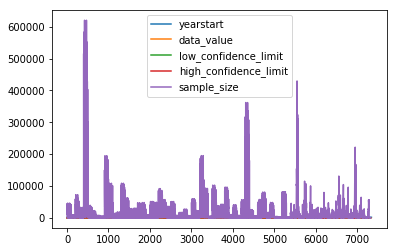

In [17]:
a = data_final.plot()
plt.show()

## B:   **Log Plot**  

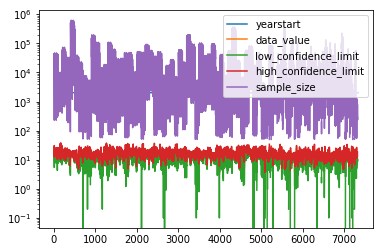

In [18]:
data_final.plot()
plt.yscale('log')

## C:   **Histogram**  


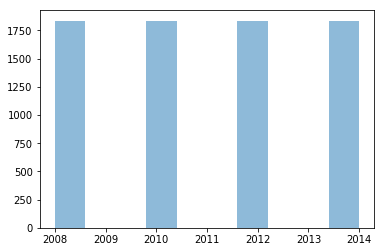

In [19]:
x = data_final["yearstart"]
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, alpha=0.5)

## D.   **Scatter Plot**  

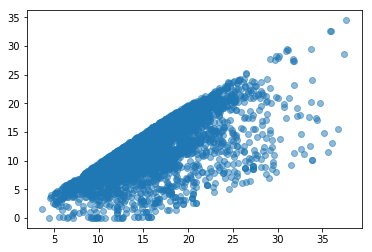

In [20]:
x = data_final['high_confidence_limit']
y = data_final['low_confidence_limit']
plt.scatter(x, y, alpha=0.5)

## E. **Bar Graph**  

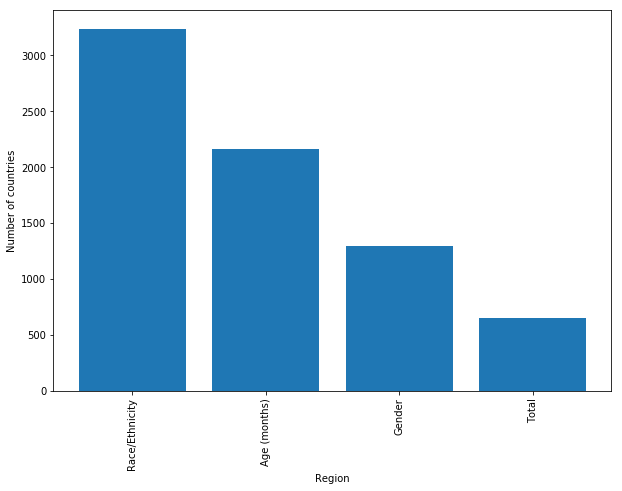

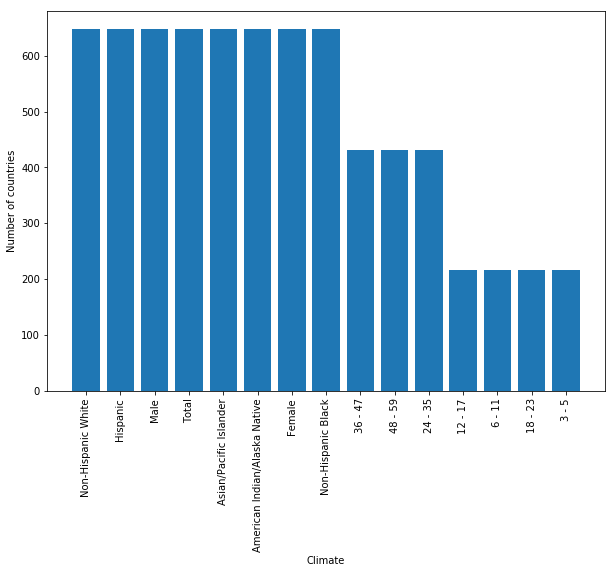

In [21]:
stratifications = data.stratificationcategory1.value_counts()
stratifications1 = data.stratification1.value_counts()

plt.figure(figsize=(10,7))
plt.bar(np.arange(len(stratifications.index)),stratifications.values)
plt.xticks(np.arange(len(stratifications.index)), stratifications.index)
plt.xticks(rotation=90)
plt.ylabel('Number of countries')
plt.xlabel('Region')
plt.show()
print "\n"
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(stratifications1.index)),stratifications1.values)
plt.xticks(np.arange(len(stratifications1.index)), stratifications1.index)
plt.xticks(rotation=90)
plt.ylabel('Number of countries')
plt.xlabel('Climate')
plt.show()

## F.   **Heatmap**  
  
**When two sets of data are strongly linked together we say they have a High Correlation. To see corr between all the columns, we use .corr()**

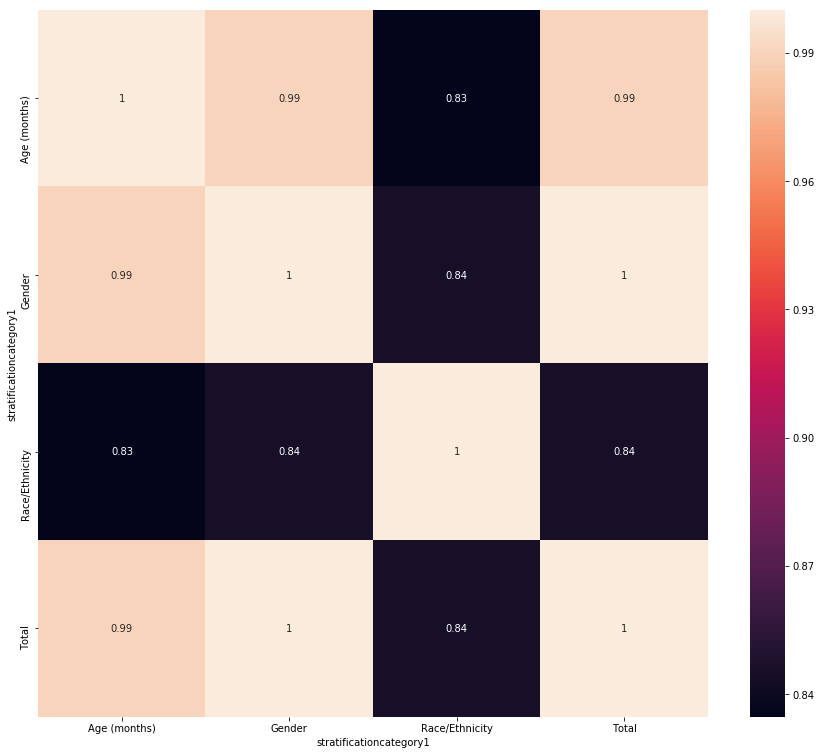

In [22]:
f,ax = plt.subplots(figsize=(15, 13))
sns.heatmap(data_rearranged.corr(), annot=True, ax=ax)
plt.show()

## H:   **Box Plot**  

**Box plots are another good way to visualize data. Here, each of our new dataframes have similar data. It is convenient to be able to plot them next to each other. Once again we use plotly.graph_objs for this**

In [23]:
trace0 = go.Box(
    y = new_data.Total,
    name = "low_confidence_limit",
    boxpoints='all',
    pointpos=0,
    fillcolor='rgba(255, 255, 255, 0.8)',
    marker = dict(color = 'rgba(0, 255, 0, 0.8)')
    )

trace1 = go.Box(
    y = data_rearranged.Total,
    boxpoints='all',
    name = "data_value",
    pointpos=0,
    fillcolor='rgba(255, 255, 255, 0.8)',
    marker = dict(color = 'rgba(255, 0, 0, 0.8)')
    )

trace2 = go.Box(
    y = new_data2.Total,
    boxpoints='all',
    name = "high_confidence_limit",
    pointpos=0,
    fillcolor='rgba(255, 255, 255, 0.8)',
    marker = dict(color = 'rgba(0, 0, 255, 0.8)')
    )

plotdata = go.Figure(data = [trace0,trace1,trace2])
plt.savefig('images/box_plot.png', bbox_inches="tight")
iplot(plotdata)

<Figure size 432x288 with 0 Axes>

## J:   **World Map Projection**  
  
**Next we want to be able to make more complex visualizations to better understand code** 
  
**To start with, lets use plotly.graph_objs to visualize data on a USA map.**  
   
This can be repeated for the other dataframes.

In [24]:
data2 = dict(
        type='choropleth',
        locations = list(data_rearranged.index),
        z = data_rearranged.Total,
        locationmode = 'USA-states',
        text = list(data_rearranged.index),colorbar = {'title':'Total Obesity Value', 'tickmode' : 'array',},
    )

layout = dict(title='Location Projections',
    geo = dict(projection={'type':'albers usa'}))
    
fig = dict( data=[data2], layout=layout )
plt.savefig('images/world_plot.png', bbox_inches="tight")
iplot(fig)

<Figure size 432x288 with 0 Axes>